# Covraiance
https://datascienceplus.com/understanding-the-covariance-matrix/

Variance: $
\sigma^2_x = \frac{1}{n-1} \sum^{n}_{i=1}(x_i – \bar{x})^2 \\
$

Covriance of two random variable is given by:
$
\sigma(x, y) = \frac{1}{n-1} \sum^{n}_{i=1}{(x_i-\bar{x})(y_i-\bar{y})}
$

Covariance Matrix is given by:
$
C = \frac{1}{n-1} \sum^{n}_{i=1}{(X_i-\bar{X})(X_i-\bar{X})^T}
$

$C \in \mathbb{R}^{d \times d}$

$X \in \mathbb{R}^{n \times d}$

Covariance matrix for two dimensions is given by
$C = \left( \begin{array}{ccc}  \sigma(x, x) & \sigma(x, y) \\  \sigma(y, x) & \sigma(y, y) \end{array} \right)$

In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12, 8)

Covriance Matrix navie implementation

In [3]:
def mean_naive(X):
    """Compute the sample mean for a dataset by iterating over the dataset.
    
    Args:
        X: `ndarray` of shape (N, D) representing the dataset. N 
        is the size of the dataset and D is the dimensionality of the dataset.
    Returns:
        mean: `ndarray` of shape (D, ), the sample mean of the dataset `X`.
    """
    # iterate over the dataset and compute the mean vector.
    N, D = X.shape
    mean = np.zeros((D,))
    for n in range(N):
        # Update the mean vector
        mean = mean + X[n]/N
    return mean

def cov_naive(X):
    """Compute the sample covariance for a dataset by iterating over the dataset.
    
    Args:
        X: `ndarray` of shape (N, D) representing the dataset. N 
        is the size of the dataset and D is the dimensionality of the dataset.
    Returns:
        ndarray: ndarray with shape (D, D), the sample covariance of the dataset `X`.
    """
    X = np.array(X)
    N, D = X.shape
    covariance = np.zeros((D, D))
    mat = np.zeros((N, D))
    mean = mean_naive(X)
    
    for i in range(N):
        mat[i] = X[i,:] - mean
        
    for i in range(D):
        for j in range(D):
            covariance[i, j] = covariance[i, j] + mat[:,i]@mat[:,j]
            
    return covariance/N

Covriance improved variant...

In [4]:
def mean(X):
    """Compute the sample mean for a dataset.
    
    Args:
        X: `ndarray` of shape (N, D) representing the dataset. N 
        is the size of the dataset and D is the dimensionality of the dataset.
    Returns:
        ndarray: ndarray with shape (D,), the sample mean of the dataset `X`.
    """
    n = X.shape[0]
    m = np.sum(X, axis=0) / n
    return m

def cov(X):
    """Compute the sample covariance for a dataset.
    
    Args:
        X: `ndarray` of shape (N, D) representing the dataset. N 
        is the size of the dataset and D is the dimensionality of the dataset.
    Returns:
        ndarray: ndarray with shape (D, D), the sample covariance of the dataset `X`.
    """
    X = np.array(X)
    N, D = X.shape
    Xbar = mean(X)
    
    diff = X - Xbar
    
    covariance_matrix = diff.T @ diff # D x N . N x D
    covariance_matrix = covariance_matrix / N
    return covariance_matrix

In [6]:
# Normal distributed x and y vector with mean 0 and standard deviation 1
x = np.random.normal(0, 1, 500)
y = np.random.normal(0, 1, 500)
X = np.vstack((x, y)).T

(-3.0933675359913257, 3.277448879970829, -2.830539200195394, 2.821691435696737)

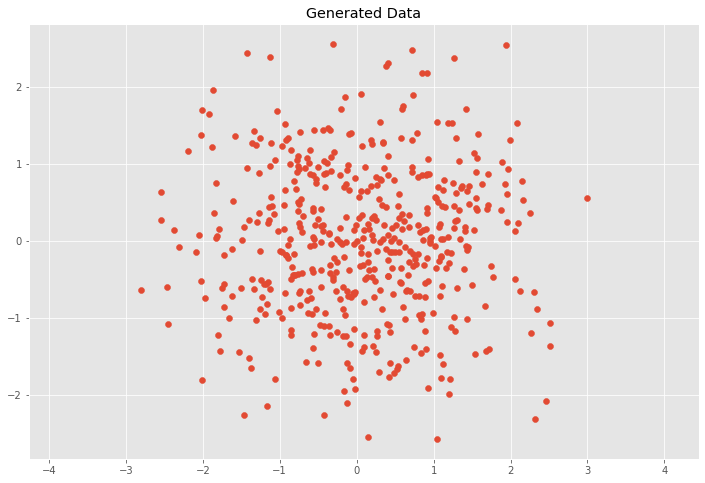

In [14]:
plt.scatter(X[:,0], X[:,1])
plt.title("Generated Data")
plt.axis('equal')

This case would mean that x and y are independent (or uncorrelated) and the covariance matrix C is
$C = \left( \begin{array}{ccc}  \sigma_x^2 & 0 \\  0 & \sigma_y^2 \end{array} \right)$

In [15]:
cov(X)

array([[ 1.12409792, -0.00254509],
       [-0.00254509,  0.92203309]])

In [17]:
cov_naive(X)

array([[ 1.12409792, -0.00254509],
       [-0.00254509,  0.92203309]])

In [23]:
np.cov(X, bias=True, rowvar=False)

array([[ 1.12409792, -0.00254509],
       [-0.00254509,  0.92203309]])

## Linear Transformations of the Data Set

Scaling matrix $S = \left( \begin{array}{ccc}  s_x & 0 \\  0 & s_y \end{array} \right)$

Covariance matrix C  of our transformed data set will simply be $C = \left( \begin{array}{ccc}  (s_x\sigma_x)^2 & 0 \\  0 & (s_y\sigma_y)^2 \end{array} \right)$

which means that we can extract the scaling matrix from our covariance matrix by calculating $S = \sqrt{C}$ and the data is transformed by $Y = SX$ .

In [25]:
X[0]

array([-1.07818284,  0.34696643])

In [26]:
X = X - np.mean(X, 0)

In [27]:
X[0]

array([-1.15180932,  0.33821684])

(-2.216895805383429, 2.2426756857900787, -9.653581882312688, 9.564002279720555)

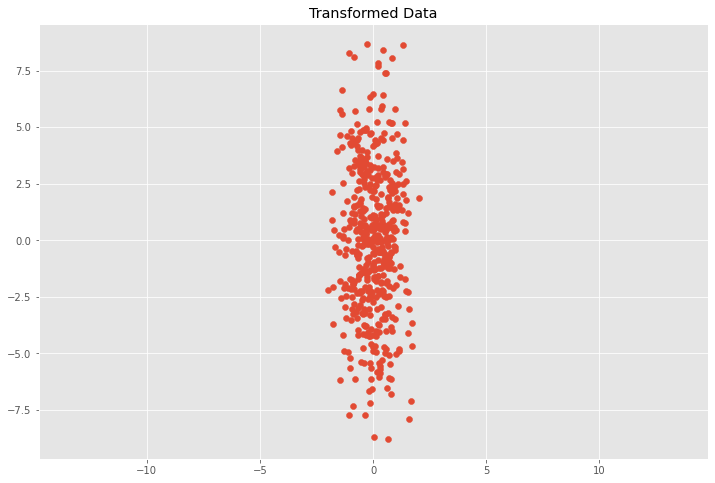

In [28]:

# Scaling matrix
sx, sy = 0.7, 3.4
Scale = np.array([[sx, 0], [0, sy]])

# Apply scaling matrix to X
Y = X.dot(Scale)

plt.scatter(Y[:, 0], Y[:, 1])
plt.title('Transformed Data')
plt.axis('equal')

In [33]:
np.cov(Y.T)

array([[ 5.51911805e-01, -6.06945876e-03],
       [-6.06945876e-03,  1.06800627e+01]])

In [34]:
np.sqrt(np.cov(Y.T))

<ipython-input-34-9cfac0cf8fc5>:1: RuntimeWarning: invalid value encountered in sqrt
  np.sqrt(np.cov(Y.T))


array([[0.74290767,        nan],
       [       nan, 3.26803652]])

We can see that this does in fact approximately match our expectation. This relation holds when the data is scaled in 
x  and y direction, but it gets more involved for other linear transformations.



$T = RS$

$R = \left( \begin{array}{ccc}  cos(\theta) & -sin(\theta) \\  sin(\theta) & cos(\theta) \end{array} \right)$

The transformed data is then calculated by $Y=RSX$

In [36]:
# Rotation matrix
theta = 0.77*np.pi
c, s = np.cos(theta), np.sin(theta)
Rot = np.array([[c, -s], [s, c]])

# Transformation matrix
T = Scale.dot(Rot)

# Apply transformation matrix to X
Y = X.dot(T)

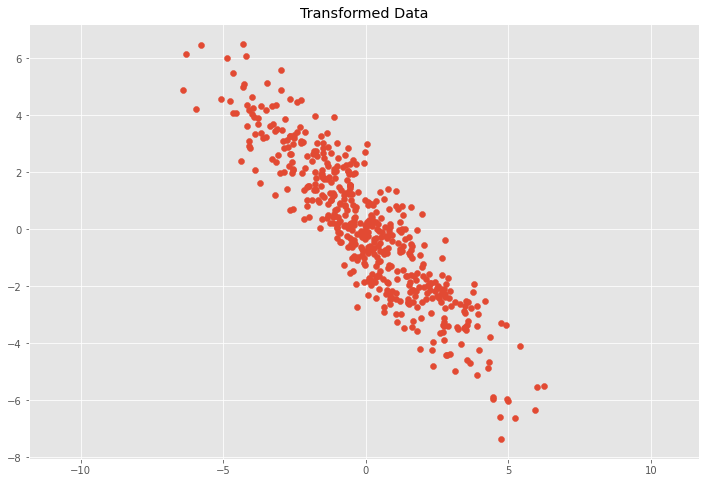

In [37]:
plt.scatter(Y[:, 0], Y[:, 1])
plt.title('Transformed Data')
plt.axis('equal');

**This leads to the question of how to decompose the covariance matrix C into a rotation matrix R and a scaling matrix S.**

## Eigen Decomposition of the Covariance Matrix
Eigen Decomposition is one connection between a linear transformation and the covariance matrix. An eigenvector is a vector whose direction remains unchanged when a linear transformation is applied to it. It can be expressed as

$$Av=\lambda v$$

where v is an eigenvector of A and λ is the corresponding eigenvalue. If we put all **eigenvectors into the columns of a Matrix V** and **all eigenvalues as the entries of a diagonal matrix L** we can write for our covariance matrix C the following equation

$$CV = VL$$

where the covariance matrix can be represented as

$$C = VLV^{-1}$$

where the rotation matrix $R = V$  and the scaling matrix $S = √L$. From the previous linear transformation $T = RS$ we can derive
$$C = RSSR^{-1} = TT^T$$

In [40]:
C = np.cov(Y.T)
C

array([[ 4.98731189, -5.0249044 ],
       [-5.0249044 ,  6.24466259]])

In [42]:
# Calculate eigenvalues
eVa, eVe = np.linalg.eig(C)
print(eVa)
print(eVe)

[ 0.55190817 10.68006632]
[[-0.74971463  0.66176126]
 [-0.66176126 -0.74971463]]


In [43]:
# Calculate transformation matrix from eigen decomposition
R, S = eVe, np.diag(np.sqrt(eVa))
T = R.dot(S).T

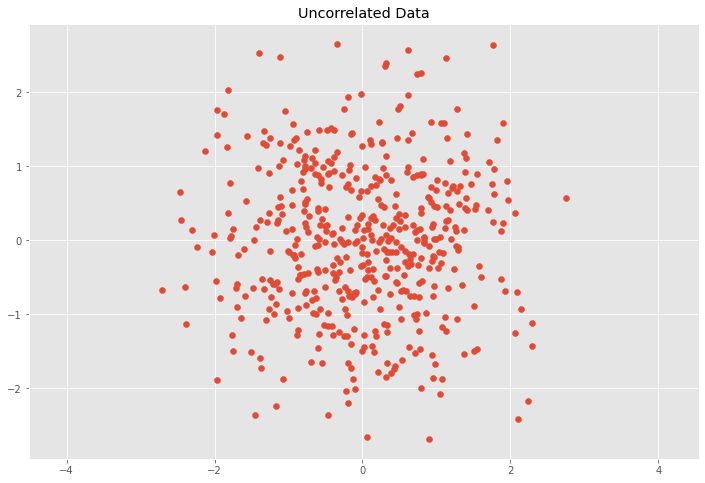

In [44]:
# Transform data with inverse transformation matrix T^-1
Z = Y.dot(np.linalg.inv(T))

plt.scatter(Z[:, 0], Z[:, 1])
plt.title('Uncorrelated Data')
plt.axis('equal');

In [8]:
np.dot(np.array([1,2,3]), np.array([2,3,-5]))

-7

In [7]:
np.cos(-1/5*np.sqrt(2))

5.385164807134504

In [13]:
np.cos(-7/np.sqrt(15)*np.sqrt(33)

0.9602659565705262

In [10]:
np.cos(4/5)

0.6967067093471654

In [47]:
import math
def length(x):
  """Compute the length of a vector"""
  length_x = np.sqrt(np.sum(np.square(x))) # <--- compute the length of a vector x here.
  
  return length_x
def angle(x, y):
    x = np.array(x)
    y = np.array(y)
    print(x.dot(y))
    print(length(x))
    print(length(y))
    return math.acos(x.dot(y)/(length(x)*length(y)))

In [45]:

import math

def dotproduct(v1, v2):
  return sum((a*b) for a, b in zip(v1, v2))

def length(v):
  return math.sqrt(dotproduct(v, v))

def angle(v1, v2):
    v1 = np.array(v1)
    v2 = np.array(v2)
    print(dotproduct(v1, v2))
    print(length(v1))
    print(length(v2))
    return math.acos(dotproduct(v1, v2) / (length(v1) * length(v2)))

In [48]:
angle([3,4],[-1,-1])

-7
5.0
1.4142135623730951


2.9996955989856287

In [32]:
angle([1,2,3], [2,2,-5])

2.002829357226812

In [21]:
np.sqrt(4+25)

5.385164807134504

In [102]:
def beta(A):
    x = np.array([1,0])
    y = np.array([0,1])
    dot = x.dot(y)
    iprod1 = x.T @ A @ y
    iprod2 = y.T @ A @ x
    val, _ = np.linalg.eig(A)
    # dot, bilinear, definite, symetric
    print(dot),
    print(iprod1)
    print("Is Bilinear \t\t", iprod1==iprod2)
    print("Is Positive definite, ", np.all(val > 0))
    print("Is Symetric\t\t ", np.allclose(A, A.T))
    print("Is inner product ", dot == iprod1)

In [104]:
beta(np.array([[2,-1],[-1,1]]))

0
-1
Is Bilinaer 		 True
Is Positive definite,  True
Is Symetric		  True
Is inner product  False


In [105]:
beta(np.array([[1,-1],[-1,1]]))

0
-1
Is Bilinaer 		 True
Is Positive definite,  False
Is Symetric		  True
Is inner product  False


In [106]:
beta(np.array([[2,1],[-1,1]]))

0
1
Is Bilinaer 		 False
Is Positive definite,  True
Is Symetric		  False
Is inner product  False


In [107]:
beta(np.array([[1,0],[0,1]]))

0
0
Is Bilinaer 		 True
Is Positive definite,  True
Is Symetric		  True
Is inner product  True


In [109]:
def innnerproductlength(a,b,A):
    return a.T @ A @ b

In [111]:
A = np.array([[2,1,0],[1,2,-1],[0,-1,2]])
innnerproductlength(np.array([1,-1,3]),np.array([1,-1,3]), A )

26

In [115]:
A = np.array([[2,1,0],[1,2,-1],[0,-1,2]])
x = np.array([1/2,-1,-1/2])
y = np.array([0,1,0])
innnerproductlength(x-y,x-y,A)

5.0

In [117]:
A = np.array([[5/2,-1/2],[-1/2,5/2]])
x = np.array([-1,1])
y = np.array([-1,1])
innnerproductlength(x,x,A)

6.0

In [118]:
A = np.array([[2,1,0],[1,2,-1],[0,-1,2]])
x = np.array([4,2,1])
y = np.array([0,1,0])
innnerproductlength(x-y,x-y,A)

42

In [119]:
np.sqrt(42)

6.48074069840786

### Angles between vectors using a non-standard inner product

In [186]:
import math
def length(x,y,A):
    return (x.T @ A @ y)
def angleinrad(x,y,A):
    return np.arccos(length(x,y, A) / np.sqrt(length(x,x, A) * length(y,y,A)))

In [187]:
A = np.array([[2,0],[0,1]])
x = np.array([1,1])
y = np.array([-1,1])
angleinrad(x,y,A)

1.9106332362490186

In [188]:
x = np.array([1,1])
y = np.array([-1,1])
A = np.array([[2,-1],[-1,4]])

angleinrad(x,y,A)

1.2094292028881888

In [191]:
x = np.array([0,-1])
y = np.array([1,1])
A = np.array([[1,-1/2],[-1/2,5]])

angleinrad(x,y,A)

2.6905658417935308

In [192]:
x = np.array([2,2])
y = np.array([-2,-2])
A = np.array([[2,1],[1,4]])

angleinrad(x,y,A)

3.141592653589793

In [193]:
x = np.array([1,1])
y = np.array([1,-1])
A = np.array([[1,0],[0,5]])

angleinrad(x,y,A)

2.300523983021863

In [194]:
x = np.array([1,1,1])
y = np.array([2,-1,0])
A = np.array([[1,0,0],[0,2,-1],[0,-1,3]])

angleinrad(x,y,A)

1.3652273956337226

In [195]:
np.arccos(4/5)

0.6435011087932843

In [230]:
def projectionmat(b):
    b = np.array(b)
    return np.outer(b.T, b), b.dot(b)

In [231]:
projectionmat([1,2,2])

(array([[1, 2, 2],
        [2, 4, 4],
        [2, 4, 4]]),
 9)

In [244]:
def projection(x, b):
    x = np.array(x)
    b = np.array(b)
    return (np.outer(x.T, b),b.dot(b)), b

In [245]:
projection([1,1,1],[3,0,4])

((array([[3, 0, 4],
         [3, 0, 4],
         [3, 0, 4]]),
  25),
 array([3, 0, 4]))

In [246]:
pm, _ = projectionmat([3,0,4])

In [248]:
pm @ [1,1,1]

array([21,  0, 28])

In [250]:
a = np.array([1,1,1])
p = np.array([5/9, 10/9, 10/9])

In [254]:
np.sqrt((a - p).dot((a-p).T))

0.4714045207910317

In [332]:
def projection3dto2d(x,B):
    x = np.array(x)
    B = np.array(B)
    # (3x2 . 2x3) = 3x3
    lmbda = (np.linalg.inv(B.T@B)) @ (B.T@x)
    projected_points = B @ lmbda 
    pm = B @ (np.linalg.inv(B.T@B)) @ B.T
    return lmbda, projected_points, pm, np.linalg.matrix_rank(pm)
    

In [333]:
projection3dto2d([2,1,1],[[1,1],[2,1],[0,0]])

(array([-1.,  3.]),
 array([2., 1., 0.]),
 array([[ 1.0000000e+00, -4.4408921e-16,  0.0000000e+00],
        [-4.4408921e-16,  1.0000000e+00,  0.0000000e+00],
        [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00]]),
 2)

In [334]:
projection3dto2d([6,0,0],[[1,0],[1,1],[1,2]])

(array([ 5., -3.]),
 array([ 5.,  2., -1.]),
 array([[ 0.83333333,  0.33333333, -0.16666667],
        [ 0.33333333,  0.33333333,  0.33333333],
        [-0.16666667,  0.33333333,  0.83333333]]),
 2)

In [318]:
1/6

0.16666666666666666

In [305]:
projection3dto2d([3,2,2],[[1,0],[0,1],[0,1]])

(array([3., 2.]), array([3., 2., 2.]))

In [306]:
projection3dto2d([12,0,0],[[1,0],[1,1],[1,2]])

(array([10., -6.]), array([10.,  4., -2.]))

In [ ]:
projection(10.,  4., -2.], 10.,  4., -2.])

In [339]:
n=10
len([(i,j) for j in range(n) for i in range(n)])

100